# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [143]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [144]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [145]:
# Verify if I have my API key
print(weather_api_key)

eb944c662b7aab4ab942ee1f1817d3f8


In [146]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key
# url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | road town
Processing Record 4 of Set 1 | meulaboh
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | kruisfontein
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | geraldton
Processing Record 9 of Set 1 | beloha
Processing Record 10 of Set 1 | shizunai
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | mount gambier
Processing Record 14 of Set 1 | victoria
Processing Record 15 of Set 1 | monrovia
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | hay river
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | airai
Processing Record 20 of Set 1 | kurilsk
Processing Record 21 of Set 1 | rungata
City not found. Skipping...
Processing Record

Processing Record 38 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 39 of Set 4 | gwanda
Processing Record 40 of Set 4 | hami
Processing Record 41 of Set 4 | darnah
Processing Record 42 of Set 4 | verkh-usugli
Processing Record 43 of Set 4 | narsaq
Processing Record 44 of Set 4 | egvekinot
Processing Record 45 of Set 4 | tarko-sale
Processing Record 46 of Set 4 | tiksi
Processing Record 47 of Set 4 | shache
Processing Record 48 of Set 4 | husavik
Processing Record 49 of Set 4 | lopatino
Processing Record 0 of Set 5 | kuruman
Processing Record 1 of Set 5 | carutapera
Processing Record 2 of Set 5 | santa marta
Processing Record 3 of Set 5 | usinsk
Processing Record 4 of Set 5 | ucluelet
Processing Record 5 of Set 5 | taveta
Processing Record 6 of Set 5 | takoradi
Processing Record 7 of Set 5 | karonga
Processing Record 8 of Set 5 | talnakh
Processing Record 9 of Set 5 | longyearbyen
Processing Record 10 of Set 5 | kieta
Processing Record 11 of Set 5 | daru
Processing R

Processing Record 30 of Set 8 | mitchell
Processing Record 31 of Set 8 | charters towers
Processing Record 32 of Set 8 | lookan
Processing Record 33 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 34 of Set 8 | takhtamygda
Processing Record 35 of Set 8 | coquimbo
Processing Record 36 of Set 8 | riyadh
Processing Record 37 of Set 8 | sindor
Processing Record 38 of Set 8 | cassia
Processing Record 39 of Set 8 | yomou
Processing Record 40 of Set 8 | lolua
City not found. Skipping...
Processing Record 41 of Set 8 | serebryansk
Processing Record 42 of Set 8 | balkanabat
Processing Record 43 of Set 8 | high rock
Processing Record 44 of Set 8 | fayaoue
Processing Record 45 of Set 8 | chapais
Processing Record 46 of Set 8 | iqaluit
Processing Record 47 of Set 8 | xingyi
Processing Record 48 of Set 8 | bariadi
Processing Record 49 of Set 8 | cabo san lucas
Processing Record 0 of Set 9 | rolim de moura
City not found. Skipping...
Processing Record 1 of Set 9 | butka
Process

Processing Record 17 of Set 12 | gilgit
Processing Record 18 of Set 12 | gibara
Processing Record 19 of Set 12 | rawson
Processing Record 20 of Set 12 | samusu
City not found. Skipping...
Processing Record 21 of Set 12 | derbent
Processing Record 22 of Set 12 | mananjary
Processing Record 23 of Set 12 | waren
Processing Record 24 of Set 12 | urengoy
Processing Record 25 of Set 12 | auki
Processing Record 26 of Set 12 | soverato
Processing Record 27 of Set 12 | kargasok
Processing Record 28 of Set 12 | verkhoyansk
Processing Record 29 of Set 12 | naples
Processing Record 30 of Set 12 | bilma
Processing Record 31 of Set 12 | ulaangom
Processing Record 32 of Set 12 | novaya bryan
Processing Record 33 of Set 12 | talcahuano
Processing Record 34 of Set 12 | kamenka
Processing Record 35 of Set 12 | wladyslawowo
Processing Record 36 of Set 12 | zhelyabovka
Processing Record 37 of Set 12 | socorro
Processing Record 38 of Set 12 | brae
Processing Record 39 of Set 12 | ashcroft
Processing Record

In [153]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [154]:
# Convert max temp from fahrenheit to celsius
city_data_df["Max Temp"] = [(x-32) * 0.56 for x in city_data_df["Max Temp"]]

In [155]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.0707,172.7902,150.3880,72,96,7.36,KI,1674359888
1,road town,18.4167,-64.6167,149.3016,70,2,7.84,VG,1674359889
2,meulaboh,4.1363,96.1285,150.6904,67,89,1.40,ID,1674359889
3,ushuaia,-54.8000,-68.3000,139.4176,71,20,8.23,AR,1674359890
4,kruisfontein,-34.0033,24.7314,147.4536,89,89,6.04,ZA,1674359890


In [156]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [157]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,butaritari,3.0707,172.7902,150.3880,72,96,7.36,KI,1674359888
1,road town,18.4167,-64.6167,149.3016,70,2,7.84,VG,1674359889
2,meulaboh,4.1363,96.1285,150.6904,67,89,1.40,ID,1674359889
3,ushuaia,-54.8000,-68.3000,139.4176,71,20,8.23,AR,1674359890
4,kruisfontein,-34.0033,24.7314,147.4536,89,89,6.04,ZA,1674359890


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

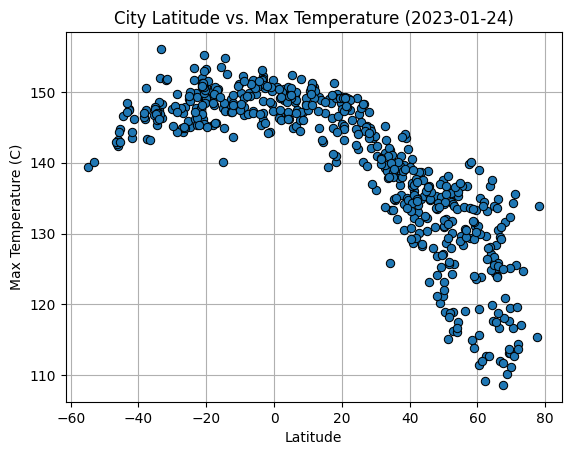

In [158]:
# Build scatter plot for latitude vs. temperature
plt.plot(city_data_df["Lat"], 
         city_data_df["Max Temp"], 
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2023-01-24)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

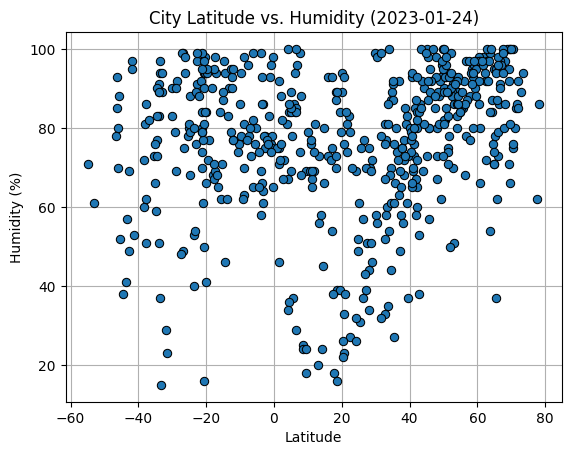

In [159]:
# Build the scatter plots for latitude vs. humidity
plt.plot(city_data_df["Lat"], 
         city_data_df["Humidity"], 
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-01-24)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

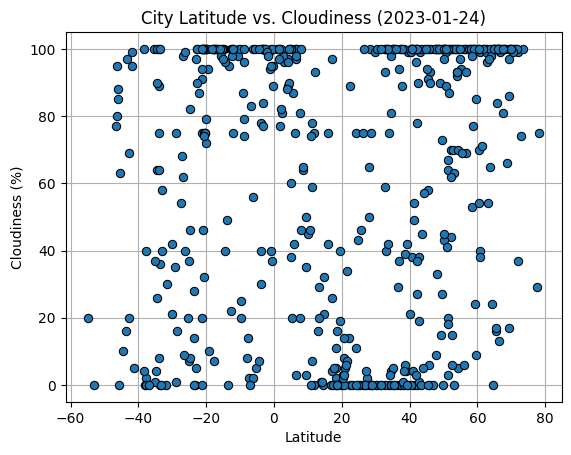

In [160]:
# Build the scatter plots for latitude vs. cloudiness
plt.plot(city_data_df["Lat"], 
         city_data_df["Cloudiness"], 
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-01-24)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

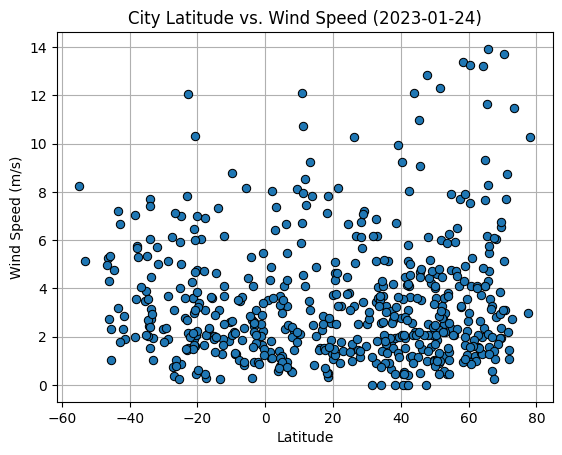

In [161]:
# Build the scatter plots for latitude vs. wind speed
plt.plot(city_data_df["Lat"], 
         city_data_df["Wind Speed"], 
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-01-24)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [162]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_data_df["Lat"], city_data_df["Max Temp"])
regress_values = city_data_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [163]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,butaritari,3.0707,172.7902,150.3880,72,96,7.36,KI,1674359888
1,road town,18.4167,-64.6167,149.3016,70,2,7.84,VG,1674359889
2,meulaboh,4.1363,96.1285,150.6904,67,89,1.40,ID,1674359889
8,shizunai,42.3339,142.3669,133.0168,60,78,8.05,JP,1674359892
10,thompson,55.7435,-97.8558,128.3744,85,100,2.06,CA,1674359893


In [164]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,ushuaia,-54.8000,-68.3000,139.4176,71,20,8.23,AR,1674359890
4,kruisfontein,-34.0033,24.7314,147.4536,89,89,6.04,ZA,1674359890
5,mataura,-46.1927,168.8643,142.2904,93,95,2.75,NZ,1674359891
6,geraldton,-28.7667,114.6000,149.7328,69,75,5.14,AU,1674359891
7,beloha,-25.1667,45.0500,149.0496,80,7,5.91,MG,1674359892


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.846540145997221


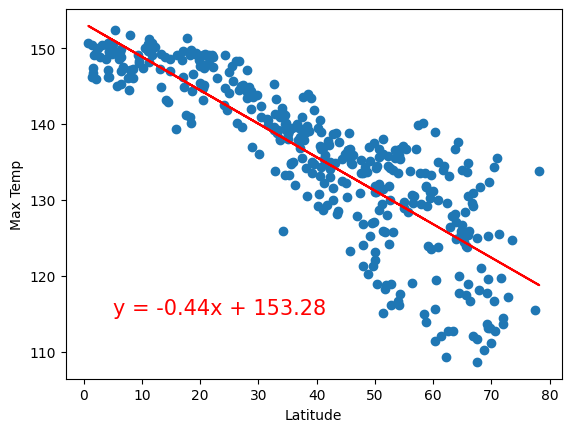

In [165]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq_northern_temp = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Determine the correlation
correlation_northern_temp = st.pearsonr(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# Create the plot
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq_northern_temp,(5,115),fontsize=15,color="red")
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
print(f"The r-value is: {correlation_northern_temp[0]}")
plt.show()


The r-value is: 0.4374299498665629


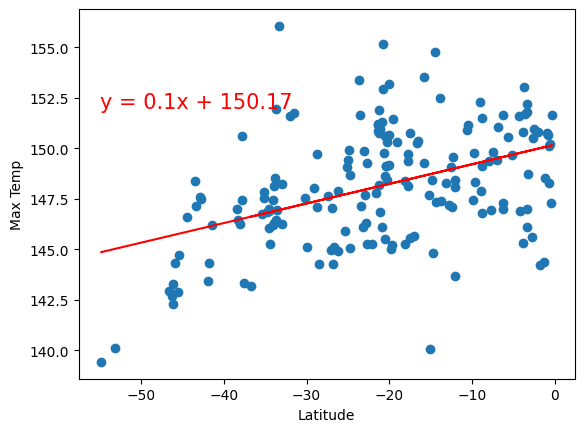

In [166]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq_southern_temp = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Determine the correlation
correlation_southern_temp = st.pearsonr(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

# Create the plot
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq_southern_temp,(-55,152),fontsize=15,color="red")
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
print(f"The r-value is: {correlation_southern_temp[0]}")
plt.show()

**Discussion about the linear relationship:** The "Temperature vs. Latitude Linear Regression Plots" have a strong negative correlation for northern latitudes and a weak positive correlation for southern latitudes

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.43340735140574105


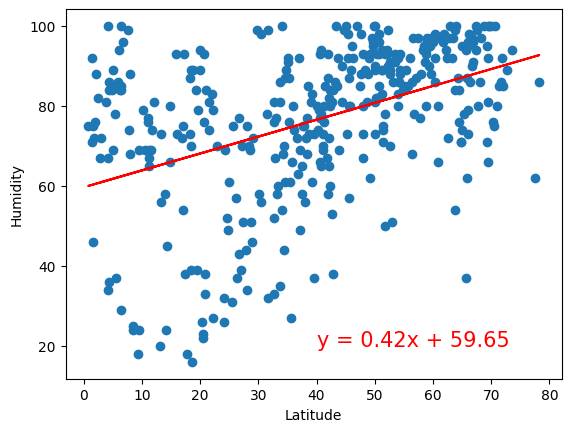

In [167]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq_northern_humidity = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Determine the correlation
correlation_northern_humidity = st.pearsonr(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# Create the plot
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq_northern_humidity,(40,20),fontsize=15,color="red")
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
print(f"The r-value is: {correlation_northern_humidity[0]}")
plt.show()

The r-value is: 0.17902721978571434


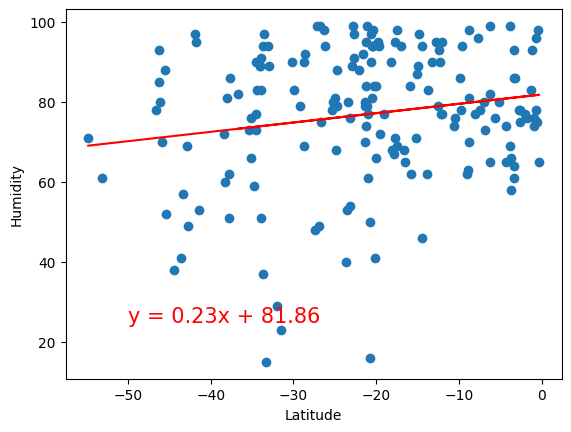

In [168]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq_southern_humidity = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Determine the correlation
correlation_southern_humidity = st.pearsonr(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Create the plot
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq_southern_humidity,(-50,25),fontsize=15,color="red")
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
print(f"The r-value is: {correlation_southern_humidity[0]}")
plt.show()

**Discussion about the linear relationship:** The northern latitudes have a weak positive correlation with humidity and the southern latitudes have a very weak positive correlation with humidity

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.3043320792484393


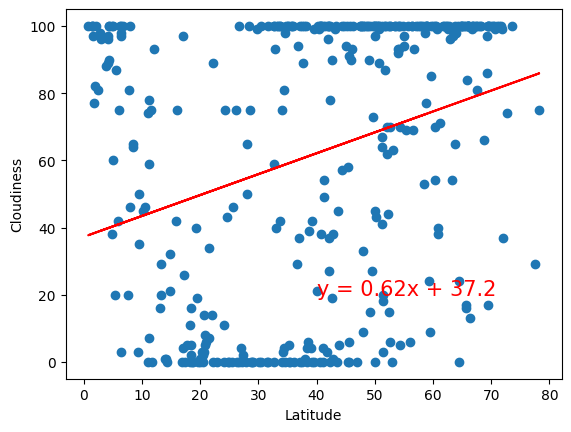

In [169]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq_northern_cloudiness = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Determine the correlation
correlation_northern_cloudiness = st.pearsonr(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Create the plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq_northern_cloudiness,(40,20),fontsize=15,color="red")
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
print(f"The r-value is: {correlation_northern_cloudiness[0]}")
plt.show()

The r-value is: 0.3035131020087524


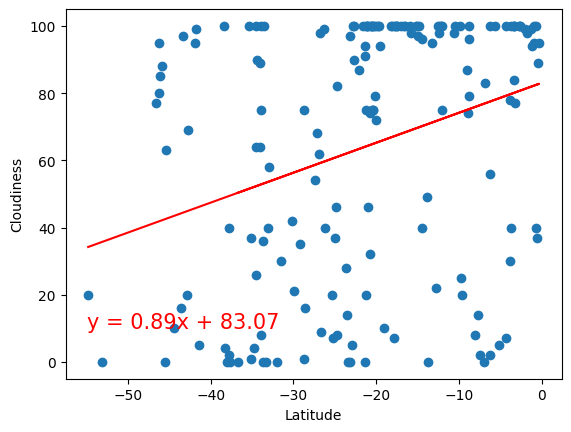

In [170]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq_southern_cloudiness = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Determine the correlation
correlation_southern_cloudiness = st.pearsonr(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Create the plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq_southern_cloudiness,(-55,10),fontsize=15,color="red")
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
print(f"The r-value is: {correlation_southern_cloudiness[0]}")
plt.show()

**Discussion about the linear relationship:** Both the nothern latitudes and southern latitudes have a weak positive correlation with cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.08757093277569507


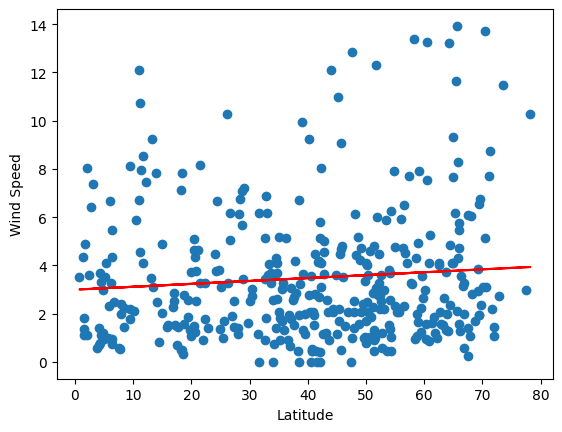

In [171]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq_northern_wind = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Determine the correlation
correlation_northern_wind = st.pearsonr(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Create the plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq_northern_wind,(5,16),fontsize=15,color="red")
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
print(f"The r-value is: {correlation_northern_wind[0]}")
plt.show()

The r-value is: -0.2631123055610578


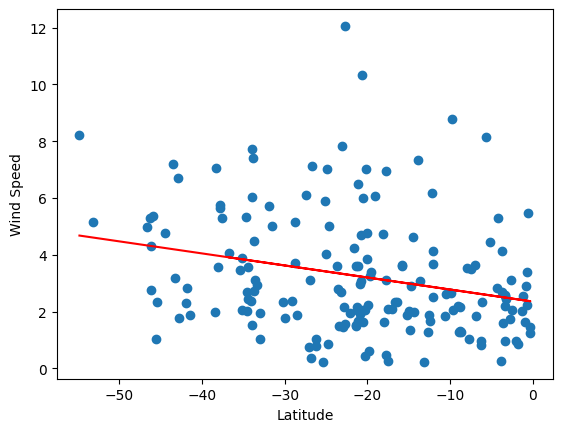

In [172]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq_southern_wind = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Determine the correlation
correlation_southern_wind = st.pearsonr(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Create the plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq_southern_wind,(5,16),fontsize=15,color="red")
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
print(f"The r-value is: {correlation_southern_wind[0]}")
plt.show()

**Discussion about the linear relationship:** The "Wind Speed vs. Latitude Linear Regression Plot" have a very weak positive correlation on northern latitudes and a weak negative correlation on southern latitudes